In [1]:
import pandas as pd 
import numpy as np 


In [2]:
df = pd.read_csv('Used_Bikes.csv')
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [3]:
df.isnull().sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [4]:
df.dtypes

bike_name      object
price         float64
city           object
kms_driven    float64
owner          object
age           float64
power         float64
brand          object
dtype: object

In [4]:
df['age'] = df['age'].astype(int)

In [5]:
df['age'].dtypes

dtype('int32')

In [6]:
df['owner'].value_counts()

owner
First Owner             29964
Second Owner             2564
Third Owner               108
Fourth Owner Or More       12
Name: count, dtype: int64

In [7]:
dc = {"First Owner":1,"Second Owner":2,"Third Owner":3,"Fourth Owner Or More":4}
df['owner'] = df['owner'].map(dc)

In [8]:
df['brand'].nunique()

23

In [9]:
df['brand'].unique()

array(['TVS', 'Royal Enfield', 'Triumph', 'Yamaha', 'Honda', 'Hero',
       'Bajaj', 'Suzuki', 'Benelli', 'KTM', 'Mahindra', 'Kawasaki',
       'Ducati', 'Hyosung', 'Harley-Davidson', 'Jawa', 'BMW', 'Indian',
       'Rajdoot', 'LML', 'Yezdi', 'MV', 'Ideal'], dtype=object)

In [10]:
dcc = {'TVS':1, 'Royal Enfield':2, 'Triumph':3, 'Yamaha':4, 'Honda':5, 'Hero':6,
       'Bajaj':7, 'Suzuki':8, 'Benelli':9, 'KTM':10, 'Mahindra':11, 'Kawasaki':12,
       'Ducati':13, 'Hyosung':14, 'Harley-Davidson':15, 'Jawa':16, 'BMW':17, 'Indian':18,
       'Rajdoot':19, 'LML':20, 'Yezdi':21, 'MV':22, 'Ideal':23}
dcc

{'TVS': 1,
 'Royal Enfield': 2,
 'Triumph': 3,
 'Yamaha': 4,
 'Honda': 5,
 'Hero': 6,
 'Bajaj': 7,
 'Suzuki': 8,
 'Benelli': 9,
 'KTM': 10,
 'Mahindra': 11,
 'Kawasaki': 12,
 'Ducati': 13,
 'Hyosung': 14,
 'Harley-Davidson': 15,
 'Jawa': 16,
 'BMW': 17,
 'Indian': 18,
 'Rajdoot': 19,
 'LML': 20,
 'Yezdi': 21,
 'MV': 22,
 'Ideal': 23}

In [11]:
df['brand'] = df['brand'].map(dcc)

In [12]:
df = df.drop(['bike_name','city'],axis=1)
df.head()

,price,kms_driven,owner,age,power,brand
0,35000.0,17654.0,1,3,110.0,1
1,119900.0,11000.0,1,4,350.0,2
2,600000.0,110.0,1,8,675.0,3
3,65000.0,16329.0,1,4,180.0,1
4,80000.0,10000.0,1,3,150.0,4


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: ylabel='kms_driven'>

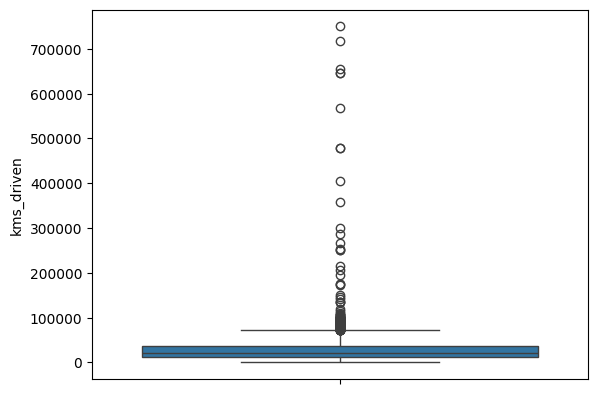

In [14]:
sns.boxplot(df[df['owner']==1]['kms_driven'])

<Axes: xlabel='kms_driven'>

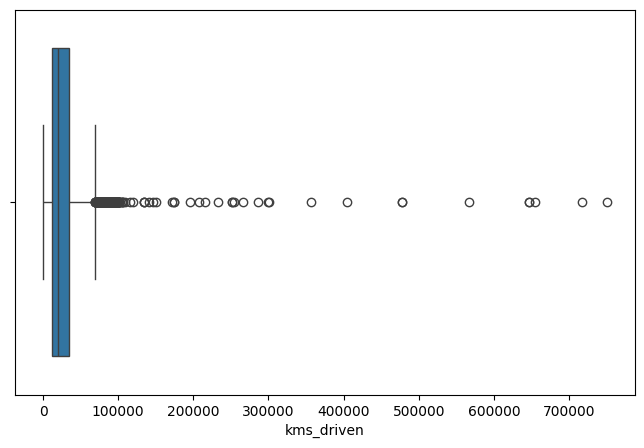

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(x='kms_driven',data=df)

In [16]:
df.dtypes

price         float64
kms_driven    float64
owner           int64
age             int32
power         float64
brand           int64
dtype: object

In [17]:
y = df[['price']]
x = df.drop('price',axis=1)


In [18]:
x.shape,    y.shape

((32648, 5), (32648, 1))

In [19]:
from sklearn.model_selection import train_test_split

In [64]:
x_train , x_test , y_train, y_test  = train_test_split(x,y,test_size=0.2)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr = LinearRegression()

In [23]:
lr.fit(x_train,y_train)

LinearRegression()

In [24]:
lr.score(x_train,y_train)

0.8095776991664523

In [25]:
pred = lr.predict(x_test)

In [28]:
pred[0:10]

array([[ 95801.94315768],
       [ 71455.41908151],
       [ 87509.12027028],
       [ 23420.47641522],
       [ 12392.64295648],
       [205617.28084811],
       [ 41866.39676722],
       [ 50135.65214218],
       [ 82377.13908231],
       [  1210.65874861]])

In [29]:
y_test['prediction'] = pred

In [49]:
r2_score(y_test['actual'],pred)

0.7991275467572347

In [46]:
r2_score(y_test,pred)

ValueError: y_true and y_pred have different number of output (2!=1)

In [31]:
y_test.columns = ['actual','prediction']

In [41]:
from sklearn.metrics import r2_score

In [44]:
round(r2_score(y_test['actual'],pred)*100,2)

79.91

In [38]:
y_test.iloc[0:20]

,actual,prediction
9287,76000.0,95801.943158
9768,35000.0,71455.419082
23278,60000.0,87509.120270
18933,11900.0,23420.476415
10545,18000.0,12392.642956
15992,196700.0,205617.280848
21864,25000.0,41866.396767
1887,81000.0,50135.652142
8531,85000.0,82377.139082
20531,18000.0,1210.658749


In [50]:
from sklearn.preprocessing import  PolynomialFeatures

In [56]:
poly = PolynomialFeatures(degree=2)

In [57]:
x_train_transformed = poly.fit_transform(x_train)

In [58]:
lr2 = LinearRegression()

In [59]:
lr2.fit(x_train_transformed,y_train)

LinearRegression()

In [60]:
x_test_transformed = poly.fit_transform(x_test)


In [61]:
pred2 = lr2.predict(x_test_transformed)

In [67]:
y_test['price']

18000     32000.0
27239     35000.0
29870     35000.0
28020     25000.0
4707     130000.0
           ...   
14496     41000.0
27132     15000.0
18547     60000.0
29303     80000.0
27453     10000.0
Name: price, Length: 6530, dtype: float64

In [65]:
r2_score(y_test,pred2)


-0.7463708947158281